
#### BUILDING THE CAR OF THE FUTURE
#### CREATED BY
#### EBIERE ADEGBESAN

## The Car Manufacturer Dataset

A car manufacturer known for making large automobiles is struggling with sales and has asked for your help in designing an energy efficient car. Using data gathered, determine which attributes may contribute to higher gas mileage so that they can design a more fuel efficient automobile.

Part 1:

Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

Part 2:

Build a linear regression model to accurately predict miles per gallon (MPG) based on the attributes of a vehicle. Discuss the significant attributes and how they can help you build the proper car.

Part 3:

Optimize the model using selection techniques, explain whether the model can achieve the specified goals, and describe which attributes contribute to higher MPG over others.

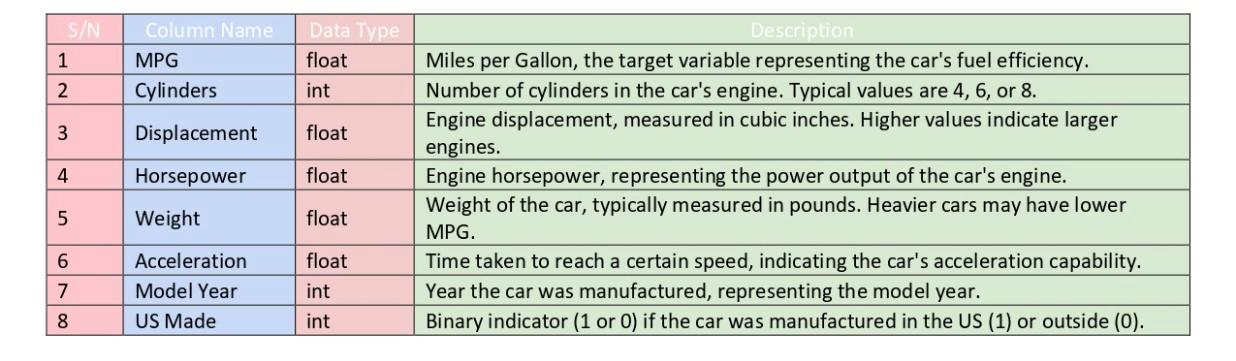

In [6]:
# Import necessary libraries
from IPython.display import Image, display

# Path to the image file
image_path = r"C:\\Users\\DELL\\OneDrive - Northeastern University\\Documents\\School\\ALY 6020\\car_data_dictionary.jpg"  # Use the full path to your image file

# Display the image
display(Image(filename=image_path))


#### The purpose of your assignment is to use data analysis and linear regression techniques to help a car manufacturer design an energy-efficient vehicle. This involves understanding which vehicle attributes contribute to higher fuel efficiency (miles per gallon or MPG

In [7]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

#SKLEARN PACKAGES
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.feature_selection import RFE

In [8]:
## Loading the dataset


car_df = pd.read_csv('C:\\Users\\DELL\\Downloads\\car.csv')

In [9]:
car_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### <span style="color:green"> STEP 1: Know your data

In [10]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
US Made,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0


In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [12]:
car_df.shape

(398, 8)

In [13]:
car_df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'US Made'],
      dtype='object')

## <span style="color:green">**Step 2: Data Cleaning and Preprocessing**</span>


In [14]:
cleaned_column_names = (car_df.columns
                        .str.strip()
                        .str.replace('((?<=[a-z0-9])[A-Z]|(?!^)[A-Z](?=[a-z]))', r'_\1')
                        .str.lower()
                        .str.replace('[ _-]+', '_')
                        .str.replace('[}{)(><.!?\\\\:;,-]', ''))

car_df.columns = cleaned_column_names


In [15]:
for c in car_df.columns:
    print('Total Missing values in \'{}\' are {}.'.format(c,car_df[c].isna().sum()))



Total Missing values in 'mpg' are 0.
Total Missing values in 'cylinders' are 0.
Total Missing values in 'displacement' are 0.
Total Missing values in 'horsepower' are 0.
Total Missing values in 'weight' are 0.
Total Missing values in 'acceleration' are 0.
Total Missing values in 'model year' are 0.
Total Missing values in 'us made' are 0.


In [16]:
# Replace missing values denoted by '?' with NaN

car_df.replace('?', np.nan, inplace=True)
 
 

In [17]:
 
# Convert 'horsepower' to numeric (as it may have missing values represented by '?')

car_df['horsepower'] = pd.to_numeric(car_df['horsepower'], errors='coerce') 

# Check again for missing values after conversion

print("\nMissing values per column after conversion:")
print(car_df.isnull().sum())
 


Missing values per column after conversion:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
us made         0
dtype: int64


In [18]:
# Check for duplicate rows in the DataFrame

duplicate_rows = car_df[car_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [20]:
# Drop the 'car id' column from the dataframe
car_df = car_df.drop(columns=['us made'])

In [21]:
median_hp = car_df['horsepower'].median()

car_df['horsepower'].fillna(median_hp, inplace=True)

print("\nMissing values per column after median imputation:")
print(car_df.isnull().sum())



Missing values per column after median imputation:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64



### Summary of Data Cleaning and Preprocessing:
### Column Name Cleaning: Adjusted column names to lowercase and replaced special characters for consistency.
### Missing Value Handling: Replaced missing values (?) in the Horsepower column with NaN and converted it to a numeric type.
### Median Imputation: Filled the 6 missing values in Horsepower with the median value to ensure data completeness.
### Duplicate Check: No duplicate rows were found in the dataset.
### Column Removal: Dropped the US Made column to focus on the core attributes for analysis. After cleaning, no missing values remain in the dataset.

In [22]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


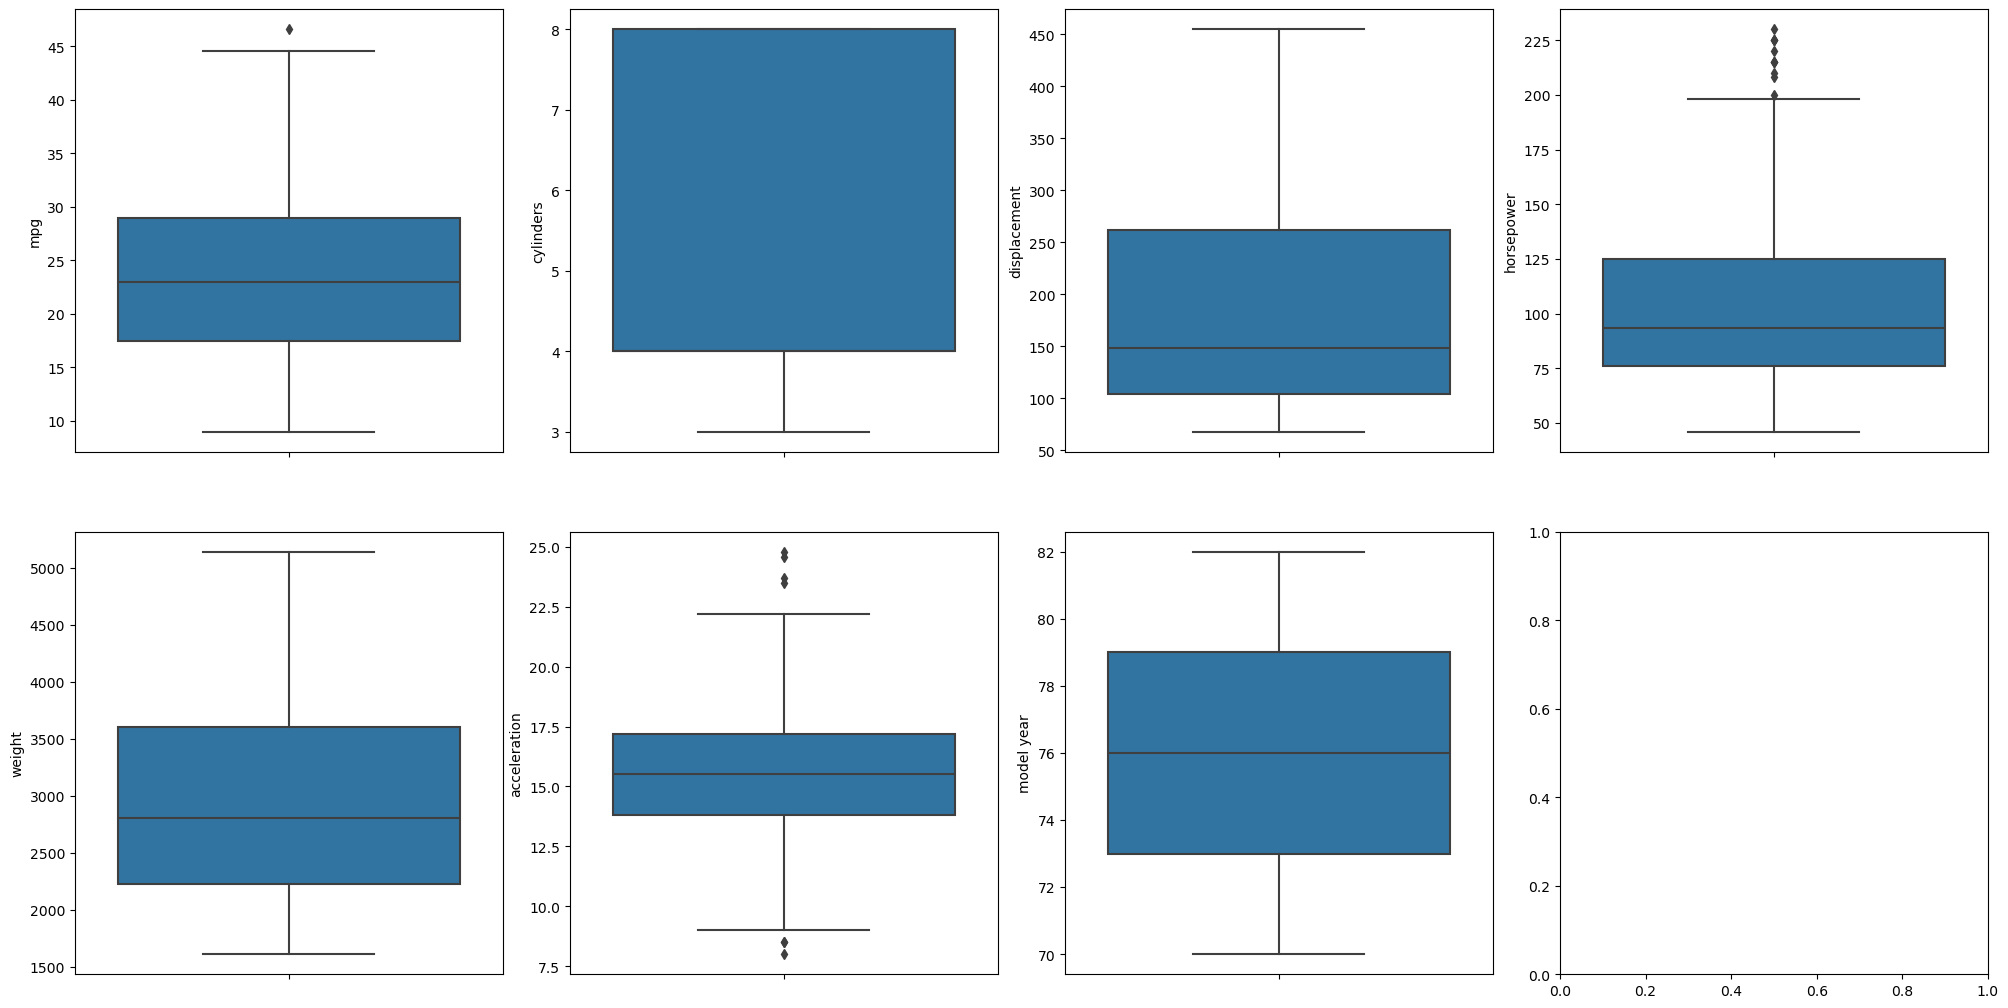

In [23]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in car_df.items():
    sns.boxplot(y=k, data=car_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [44]:
for k, v in car_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(car_df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))   

Column mpg outliers = 0.25%
Column cylinders outliers = 0.00%
Column displacement outliers = 0.00%
Column horsepower outliers = 2.76%
Column weight outliers = 0.00%
Column acceleration outliers = 2.26%
Column model year outliers = 0.00%


#### The analysis shows that Horsepower and Acceleration have the highest percentages of outliers at 2.76% and 2.26%, respectively, indicating a few cars with extreme values. MPG also has a small number of outliers (0.25%), while other columns like Cylinders, Displacement, Weight, and Model Year have no outliers. We will not handle the outliers yet we will run the model and if it affects it we will handle the outliers

### <span style="color:green">**3. Check for Multicollinearity**</span>

In [78]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = car_df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
1,displacement,19.748191
0,cylinders,10.586640
3,weight,10.522969
2,horsepower,9.002825
4,acceleration,2.553445
5,model year,1.243536


In [79]:
# compute vif values after removing a feature
considered_features.remove('horsepower')
compute_vif(considered_features)


,Variable,VIF
0,cylinders,10.477644
1,displacement,18.622068
2,weight,8.553707
3,acceleration,1.567613
4,model year,1.182317


In [80]:
# compute vif values after removing a feature
considered_features.remove('displacement')
compute_vif(considered_features)

# Now all VIFs are less than 5

,Variable,VIF
0,cylinders,5.761823
1,weight,5.115882
2,acceleration,1.380815
3,model year,1.160679


In [81]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### Multicollinearity Analysis Summary
### Initial VIF Check: High multicollinearity was detected in the initial set of features. Displacement, Cylinders, and Weight had very high Variance Inflation Factor (VIF) values (>10), indicating strong collinearity.
### Removal of Horsepower: After removing Horsepower, VIF values decreased but were still high for Displacement and Cylinders.
### Removal of Displacement: Eliminating Displacement significantly reduced the VIF values, bringing all variables below the critical threshold of 10.
### Final VIF Values: All remaining features (Cylinders, Weight, Acceleration, and Model Year) had VIF values below 6, indicating manageable multicollinearity.
### Conclusion: By removing Horsepower and Displacement, the final model avoids the issue of multicollinearity, making it more stable and reliable for regression analysis.

In [82]:
# Let's scale the columns before plotting them against mpg
min_max_scaler = preprocessing.MinMaxScaler()
x = car_df.loc[:,considered_features]
y = car_df['mpg']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=considered_features)
x.head()

,cylinders,weight,acceleration,model year
0,1.0,0.536150,0.238095,0.0
1,1.0,0.589736,0.208333,0.0
2,1.0,0.516870,0.178571,0.0
3,1.0,0.516019,0.238095,0.0
4,1.0,0.520556,0.148810,0.0


### EDA VIA REGRESSION PLOT

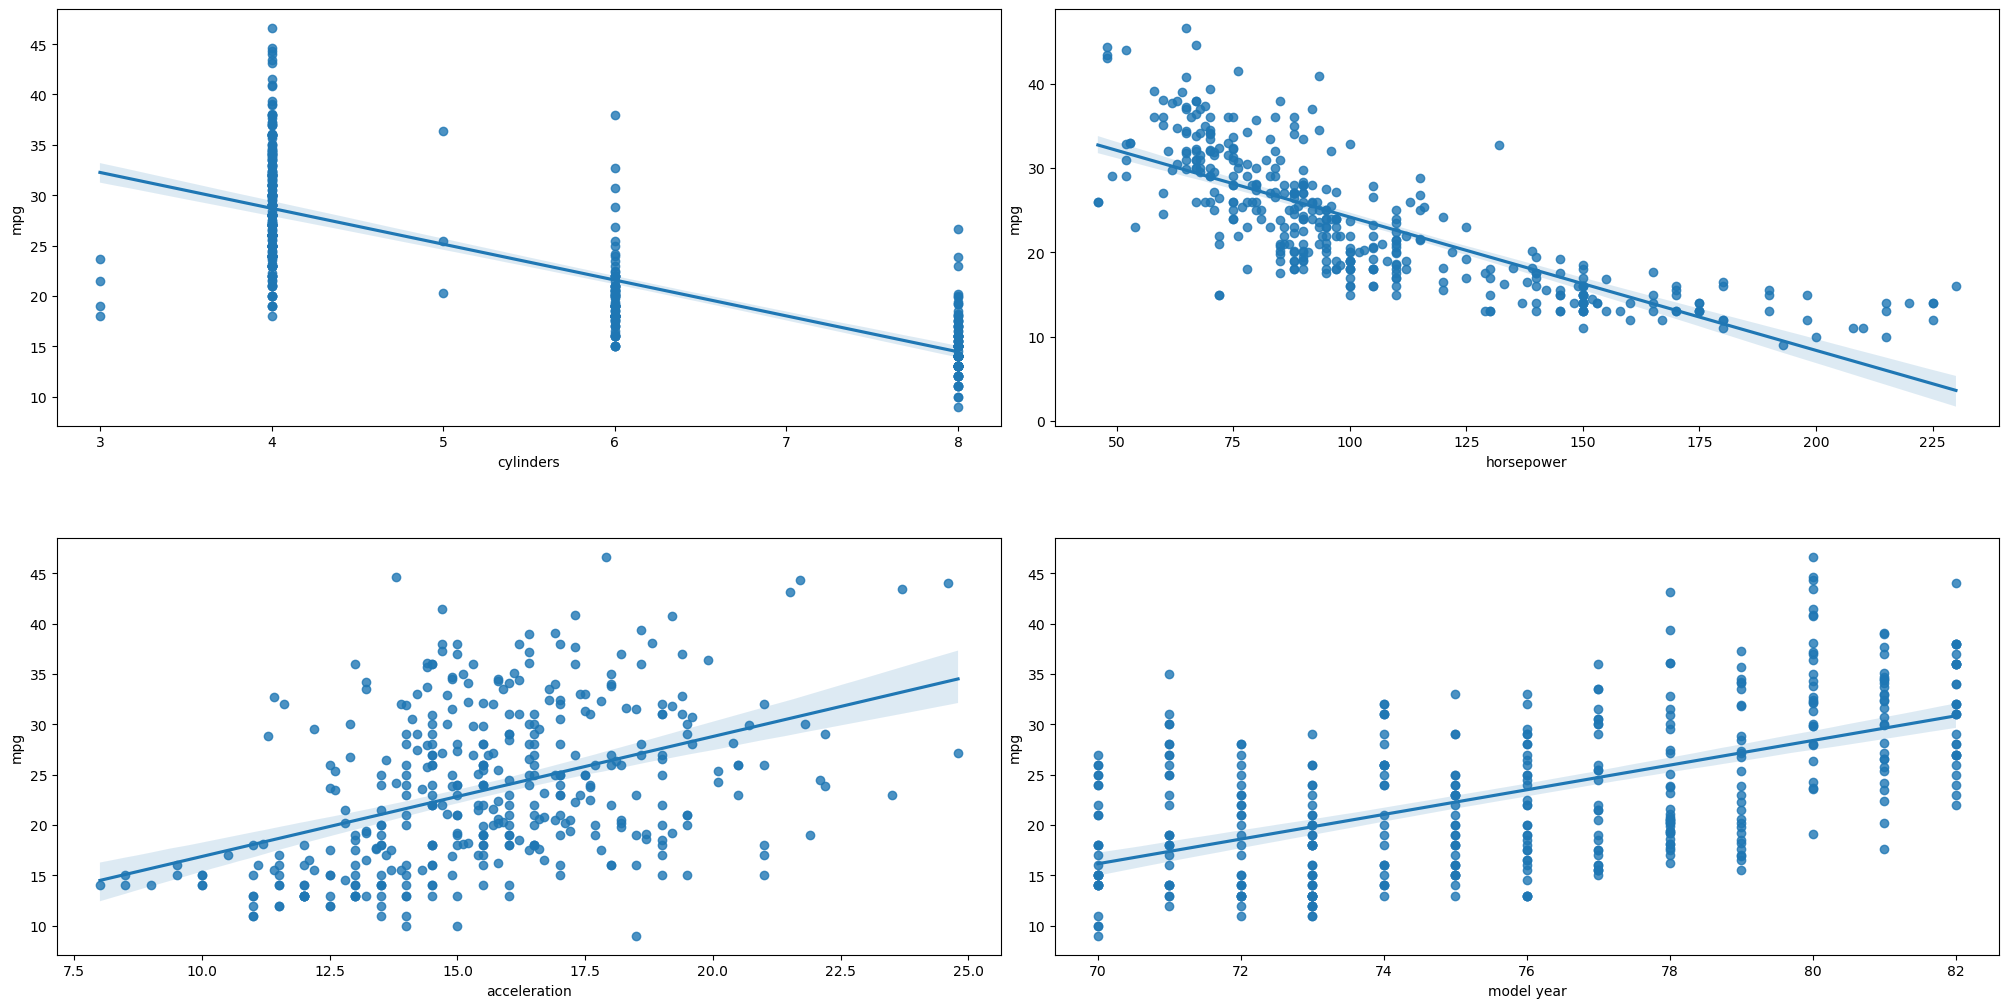

In [54]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(considered_features):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### The scatter plots indicate that Horsepower and Cylinders are negatively correlated with MPG, while Acceleration and Model Year have a positive relationship with MPG. These relationships suggest that reducing engine size (fewer cylinders and lower horsepower) and focusing on newer models could help in designing more fuel-efficient cars.

### BUILDING THE MODEL

In [83]:
# Define your considered features (after removing unwanted features like 'Horsepower')
considered_features = ['cylinders', 'weight', 'acceleration', 'model year']  # update based on your selections


considered_features

['cylinders', 'weight', 'acceleration', 'model year']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Remove random_state = 0 and see what happens 

# Ensure only the selected features are included in your training and testing data
x_train = x_train[considered_features]
x_test = x_test[considered_features]

# Fit the OLS model using only the considered features
x_train_sm = sm.add_constant(x_train)  # Add constant to the model
est2 = sm.OLS(y_train, x_train_sm).fit()  # Fit the model

# Print the summary
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     319.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          3.71e-109
Time:                        17:34:28   Log-Likelihood:                -844.40
No. Observations:                 318   AIC:                             1699.
Df Residuals:                     313   BIC:                             1718.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           26.2105      0.928     28.232   

In [85]:
## creating function to get model statistics
def get_stats():
    X2 = sm.add_constant(x_train[considered_features])
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     319.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          3.71e-109
Time:                        17:40:42   Log-Likelihood:                -844.40
No. Observations:                 318   AIC:                             1699.
Df Residuals:                     313   BIC:                             1718.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           26.2105      0.928     28.232   

In [86]:
considered_features.remove("cylinders")

get_stats()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     427.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.68e-110
Time:                        17:41:45   Log-Likelihood:                -844.41
No. Observations:                 318   AIC:                             1697.
Df Residuals:                     314   BIC:                             1712.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           26.2657      0.882     29.796   

In [91]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=2,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(x_train, y_train)
sfs.k_feature_names_     # to get the final set of features

('weight', 'model year')

In [92]:
considered_features = ['weight', 'model year']
get_stats()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     631.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          6.01e-111
Time:                        17:48:01   Log-Likelihood:                -846.76
No. Observations:                 318   AIC:                             1700.
Df Residuals:                     315   BIC:                             1711.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7185      0.574     48.322      0.0

### Model Building and Results Summary:
### Initial Model:

### The initial regression model included Cylinders, Weight, Acceleration, and Model Year.
### The model achieved an R-squared value of 0.803, indicating that approximately 80.3% of the variance in MPG can be explained by these features.
### Removing Insignificant Feature (Cylinders):

### After removing Cylinders due to its high p-value (0.848, indicating insignificance), the model retained a similar R-squared value of 0.803.
### Sequential Feature Selection:

### Sequential Forward Selection (SFS) identified Weight and Model Year as the best features for predicting MPG.
### With these two features, the model achieved an R-squared value of 0.800, showing that they are the most impactful predictors for MPG.
### Final Model:

### The final model using only Weight and Model Year maintained high explanatory power (R-squared = 0.800).
### This indicates that Weight (negative correlation) and Model Year (positive correlation) are the primary drivers of fuel efficiency (MPG).





